# Lab | Classification, Handling Imbalanced Data

## Scenario

You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

### Round 1

 - Import the required libraries and modules that you would need.
 - Read that data into Python and call the dataframe churnData.
 - Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type.
 - Convert this column into numeric type using pd.to_numeric function.
 - Check for null values in the dataframe. Replace the null values.
 - Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
 - Split the data into a training set and a test set.
 - Scale the features either by using normalizer or a standard scaler.
 - (optional)Fit a logistic Regression model on the training data.
 - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [130]:
df = pd.read_csv("file:///Users/brunasantos/Documents/GitHub/Labs_Bruna/Week%207/DATA_Customer-Churn.csv")

In [131]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [132]:
# Selecting columns from the original DataFrame
selected_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
df = df[selected_columns].copy()
# Displaying the new DataFrame
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.5,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.5,No
7039,0,72,103.20,7362.9,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.6,Yes


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
 4   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 275.2+ KB


In [134]:
df["Churn"] = df["Churn"].apply(lambda x: x.replace('No', '0') if type(x) == str else x)
df["Churn"] = df["Churn"].apply(lambda x: x.replace('Yes', '1') if type(x) == str else x)

In [135]:
df['Churn']=df['Churn'].astype(int) 

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
 4   Churn           7043 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 275.2+ KB


In [137]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.5,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.5,0
7039,0,72,103.20,7362.9,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.6,1


In [138]:
null_values = df['TotalCharges'].isnull().sum()
if null_values > 0:
    print("There are null values in the 'totalcharges' column.")
else:
    print("There are no null values in the 'totalcharges' column.")

There are no null values in the 'totalcharges' column.


In [139]:
df['TotalCharges'].isnull().sum()

0

In [140]:
#Check the datatypes of all the columns and convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [141]:
meantc = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(meantc)

In [142]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   Churn           7043 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 275.2 KB


In [144]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


## Split train and test

In [145]:
X = df[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]]
y = df[['Churn']]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

## Scaler the features

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [148]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_scaler_train= scaler.transform(X_train)

X_scaler_test= scaler.transform(X_test)

## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [150]:
log_model = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)

log_model.fit(X_train, y_train)


y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.789670,0.797019
1,Precision,0.648833,0.674242
2,Recall,0.447351,0.470899


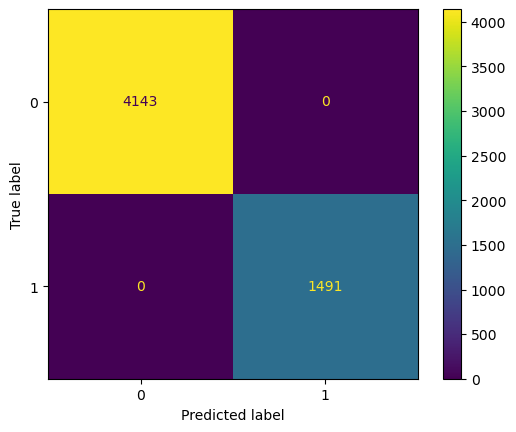

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train,y_train, labels = log_model.classes_)

disp = ConfusionMatrixDisplay(cm_train)
disp.plot()


In [152]:
df = pd.DataFrame(df)

In [153]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


## KNN Classification

In [154]:
df01 = pd.DataFrame(df)

In [155]:
df01

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [156]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.20, random_state=11)

In [157]:
scaler = MinMaxScaler()
scaler.fit(X_train_knn)

MinMaxScaler()

In [158]:
X_scaler_train_knn= scaler.transform(X_train_knn)

X_scaler_test_knn= scaler.transform(X_test_knn)

In [159]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model

model.fit(X_train_knn, y_train_knn) # train model

KNeighborsClassifier(n_neighbors=3)

In [160]:
y_pred_knn = model.predict(X_test_knn) # predict test
y_pred_train_knn=model.predict(X_train_knn) # predict train (for sanity checks)
#model.predict_proba(inputdata)

,Error_metric,Train,Test
0,Accuracy,0.861022,0.738822
1,Precision,0.782297,0.517007
2,Recall,0.657948,0.402116


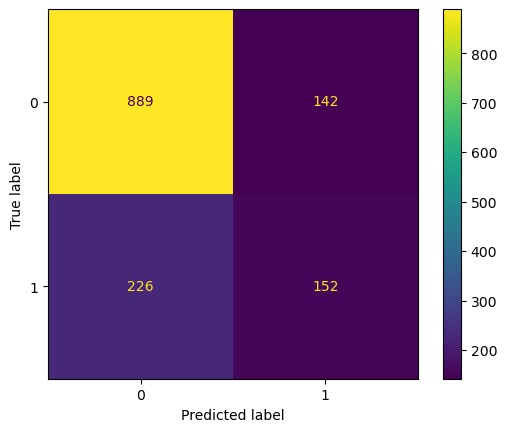

In [161]:
cm = confusion_matrix(y_test_knn, y_pred_knn, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_knn, y_pred_train_knn),
                                         precision_score(y_train_knn, y_pred_train_knn),
                                         recall_score(y_train_knn, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_knn),
                                        precision_score(y_test, y_pred_knn),
                                        recall_score(y_test, y_pred_knn)]})

display(performance_log)


In [162]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize an empty list to store the classification reports
reports = []

# Iterate over the range of n_neighbors
for n in range(1, 21):
    # Create the KNN classifier model
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform')

    # Train the model
    model.fit(X_train_knn, y_train_knn)

    # Predict the test data
    y_pred_knn = model.predict(X_test_knn)

    # Generate the classification report
    report = classification_report(y_test_knn, y_pred_knn)

    # Append the classification report to the list
    reports.append((n, report))

# Display the classification reports for each n_neighbors value
for n, report in reports:
    print(f"n_neighbors = {n}\n{report}\n")

n_neighbors = 1
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1031
           1       0.47      0.45      0.46       378

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409


n_neighbors = 2
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1031
           1       0.61      0.24      0.34       378

    accuracy                           0.75      1409
   macro avg       0.69      0.59      0.60      1409
weighted avg       0.73      0.75      0.71      1409


n_neighbors = 3
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1031
           1       0.52      0.40      0.45       378

    accuracy                           0.74      1409
   macro avg       0.66      0.63      0.64      1409
weighted avg       0.72 